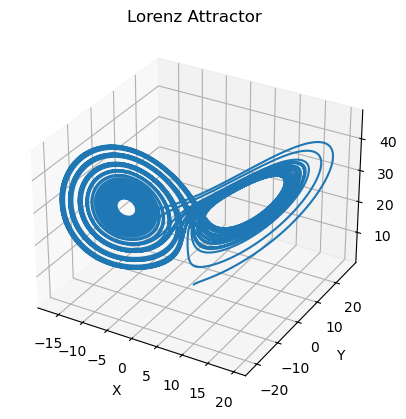

In [2]:
import numpy as np
from scipy.integrate import solve_ivp
import matplotlib.pyplot as plt
from local_equations import * 


# Parameters
sigma = 10
rho = 28
beta = 8/3

# Initial conditions
x0, y0, z0 = 1, 1, 1
initial_state = [x0, y0, z0]

# Time span
t_span = (0, 50)
t_eval = np.linspace(0, 50, 10000)  # Points at which to store the results

# Solve the differential equations
solution = solve_ivp(lorenz, t_span, initial_state, args=(sigma, rho, beta), t_eval=t_eval)

# Plot the solution
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot(solution.y[0], solution.y[1], solution.y[2])
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
ax.set_title('Lorenz Attractor')
plt.show()


In [2]:
solution

  message: The solver successfully reached the end of the integration interval.
  success: True
   status: 0
        t: [ 0.000e+00  5.001e-03 ...  4.999e+01  5.000e+01]
        y: [[ 1.000e+00  1.003e+00 ... -8.816e-01 -8.992e-01]
            [ 1.000e+00  1.130e+00 ... -1.216e+00 -1.268e+00]
            [ 1.000e+00  9.920e-01 ...  1.495e+01  1.476e+01]]
      sol: None
 t_events: None
 y_events: None
     nfev: 4790
     njev: 0
      nlu: 0

In [3]:
import torch
from torch.utils.data import Dataset, DataLoader

class LorenzDataset(Dataset):
    def __init__(self, batch_size, t_steps):
        self.batch_size = batch_size
        self.t_steps = t_steps
        
    def __len__(self):
        return self.batch_size
    
    def __getitem__(self, idx):
        t_span = torch.linspace(0, 50, self.t_steps)
        delta_t = t_span[1] - t_span[0]
        
        # Parameters
        sigma = 10
        rho = 28
        beta = 8/3
        
        # Initial conditions
        x0 = torch.randn(self.batch_size)
        y0 = torch.randn(self.batch_size)
        z0 = torch.randn(self.batch_size)
        
        states = torch.stack([x0, y0, z0], dim=1)
        solutions = []
        
        for t in range(1, len(t_span)):
            x, y, z = states[:, 0], states[:, 1], states[:, 2]
            dxdt = sigma * (y - x)
            dydt = x * (rho - z) - y
            dzdt = x * y - beta * z
            
            x_new = x + dxdt * delta_t
            y_new = y + dydt * delta_t
            z_new = z + dzdt * delta_t
            
            states = torch.stack([x_new, y_new, z_new], dim=1)
            solutions.append(states.unsqueeze(1))
        
        return torch.cat(solutions, dim=1)

# Example usage
batch_size = 1
t_steps = 10000
lorenz_loader = DataLoader(LorenzDataset(batch_size, t_steps), batch_size=1)

# Iterate over batches
for batch in lorenz_loader:
    # batch has shape (batch_size, t_steps, 3)
    print(batch.shape)
    break  # break after printing the first batch


torch.Size([1, 1, 9999, 3])
